# Part I - San Francisco Bay Ford GoBike Analysis
## by Eddie Spall

## Introduction
> This project will be focused around an exploration and analysis of data surrounding 'rides made in a bike-sharing system covering the greater San Francisco Bay area.' The system of bike shares that was rebranded as Ford GoBike in June 2017. Since then the company has rebranded as BayWheels.  It is expected to expand to 7000 bikes across multiple areas in west America.
>For this analysis, I will only be analysing available data from when the company was branded as 'Ford GoBike', from June 2017 until April 2019. 

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

In [3]:
#!conda install folium -c conda-forge

In [4]:
path = r'C:\Users\eddie\OneDrive\Documents\Career\Visualisation Project\FordGoBike Data'
csv_files = glob.glob(path + "/*.csv")

In [5]:
csv_files

['C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\2017-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201801-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201802-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201803-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201804-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201805-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201806-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDrive\\Documents\\Career\\Visualisation Project\\FordGoBike Data\\201807-fordgobike-tripdata.csv',
 'C:\\Users\\eddie\\OneDri

In [6]:
df = pd.concat(map(pd.read_csv, csv_files), ignore_index = True)

In [7]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254320,184,2019-04-01 00:09:17.5660,2019-04-01 00:12:22.5170,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,No
3254321,539,2019-04-01 00:03:02.5730,2019-04-01 00:12:02.0670,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,Yes
3254322,292,2019-04-01 00:06:04.2370,2019-04-01 00:10:56.9850,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,Yes
3254323,471,2019-04-01 00:01:38.4110,2019-04-01 00:09:29.9650,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,Yes


In [8]:
df.shape

(3254325, 14)

In [9]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [11]:
df['end_time'] = pd.to_datetime(df['end_time'])

In [12]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    519700
dtype: int64

In [13]:
wrong_lat_idx = df.loc[df['start_station_id'].isna()]['start_station_latitude'].value_counts().sort_index().index
wrong_lat_idx

Float64Index([37.32, 37.33, 37.34, 37.35, 37.36, 37.37, 37.38, 37.39,  37.4,
              37.41, 37.42, 37.43, 37.44, 37.45, 40.66, 44.95,  45.5, 45.51],
             dtype='float64')

In [14]:
df.loc[df['start_station_latitude'].isin(wrong_lat_idx)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
1143064,5572,2018-06-30 20:58:31.855,2018-06-30 22:31:24.593,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No
1143076,573,2018-06-30 22:12:27.511,2018-06-30 22:22:01.174,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes
1143093,850,2018-06-30 22:01:25.585,2018-06-30 22:15:36.151,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No
1143129,562,2018-06-30 21:52:05.118,2018-06-30 22:01:27.440,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No
1143156,819,2018-06-30 21:37:34.506,2018-06-30 21:51:13.729,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241422,681,2019-04-02 12:27:15.531,2019-04-02 12:38:36.932,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4211,Subscriber,No
3245234,4803,2019-04-01 19:03:07.473,2019-04-01 20:23:10.731,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.94,4270,Customer,No
3248115,13460,2019-04-01 13:42:15.073,2019-04-01 17:26:35.895,NaN,NaN,37.41,-121.95,NaN,NaN,37.40,-121.94,4098,Customer,No
3249820,229,2019-04-01 13:17:14.567,2019-04-01 13:21:03.941,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4098,Customer,No


Where stations are not recorded, the latitude and longitude of trips made is misrecorded. It is also not precise enough to be a station location. 

In [15]:
df.duplicated().sum()

0

In [16]:
matrix = np.triu(df.corr())

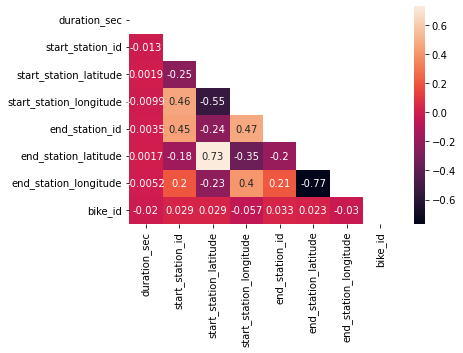

In [17]:
sns.heatmap(df.corr(), mask = matrix, annot = True);

### What is the structure of your dataset?

> My dataset contains 3,254,325 rows, with 14 columns

### What are the main features of interest in your dataset?

> I am interested in duration of bike rides, user information, and which stations are most popular. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The primary areas of focus will be using the columns 'duration_sec', 'start_station_name' and 'end_station_name', 'user_type'

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [18]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN


>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [19]:
base_colour = sns.color_palette()[0]

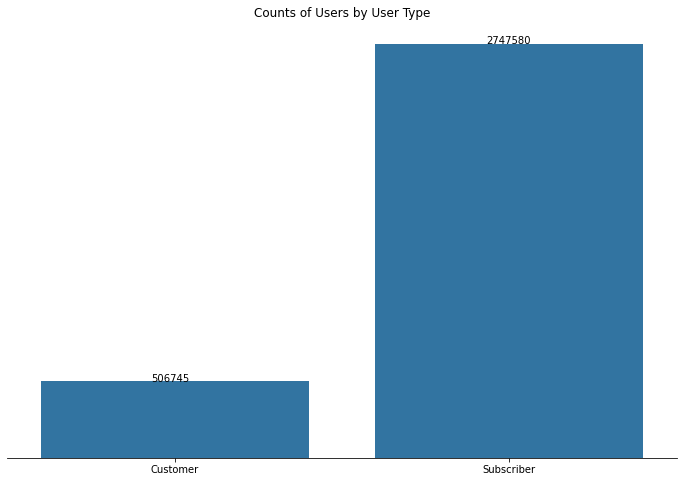

In [20]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="user_type", data=df, color = base_colour)
plt.title('Counts of Users by User Type')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+50));

ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);
plt.yticks([]);
plt.ylabel('');
plt.xlabel('');


In [21]:
#Creating a column for duration in minutes to make data more understandable.
df['duration_min'] = df['duration_sec']/60

In [22]:
df['duration_min'].describe()

count    3.254325e+06
mean     1.457204e+01
std      4.114245e+01
min      1.016667e+00
25%      5.850000e+00
50%      9.283333e+00
75%      1.455000e+01
max      1.439483e+03
Name: duration_min, dtype: float64

In [23]:
(df['duration_min']>60).value_counts()

False    3196136
True       58189
Name: duration_min, dtype: int64

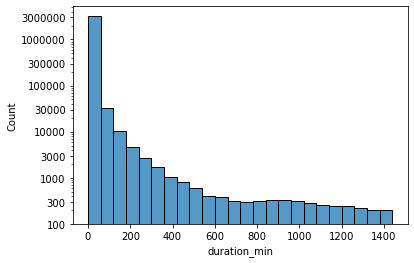

In [24]:
sns.histplot(data = df, x = 'duration_min', bins = np.arange(0, 1440+60, 60))
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log');
log_ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000]
plt.yticks(log_ticks, log_ticks);

In [25]:
#as the data shows a huge majority of the bins fall within the first hour, it may be beneficial to investigate this section of the graph 

From this data, we may want to look at the distribution of trips under and over 60 mins separately.

In [26]:
trips_under60 = df.loc[df['duration_min']<60]

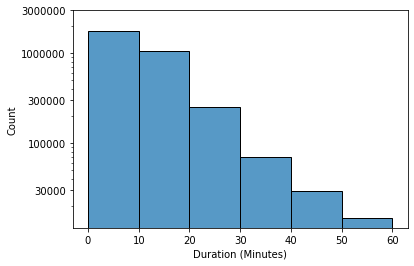

In [27]:
sns.histplot(data = trips_under60, x = 'duration_min', bins = np.arange(0, 70, 10));
plt.ticklabel_format(style='plain', axis='y');
plt.xlabel('Duration (Minutes)');
plt.yscale('log');
plt.yticks([30000, 100000, 300000, 1000000, 3000000], [30000, 100000, 300000, 1000000, 3000000]); 

In [28]:
trips_over60 = df.loc[df['duration_min']>60]

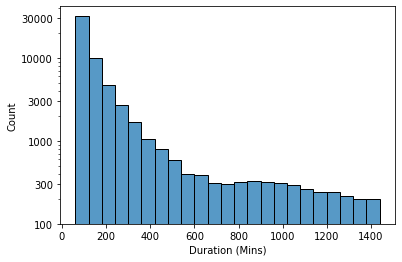

In [29]:
sns.histplot(data = trips_over60, x = 'duration_min', bins = np.arange(60, 1460, 60));
plt.xlabel('Duration (Mins)');
plt.yscale('log')
plt.yticks([100, 300, 1000, 3000, 10000, 30000], [100, 300, 1000, 3000, 10000, 30000]); 

In [30]:
print(trips_over60['duration_min'].mean())
print(trips_under60['duration_min'].mean())

197.69113835948193
11.237903391582456


In [31]:
SSidx = df['start_station_name'].value_counts().index[:10]

In [32]:
top10SS_df = df.loc[df['start_station_name'].isin(SSidx)]

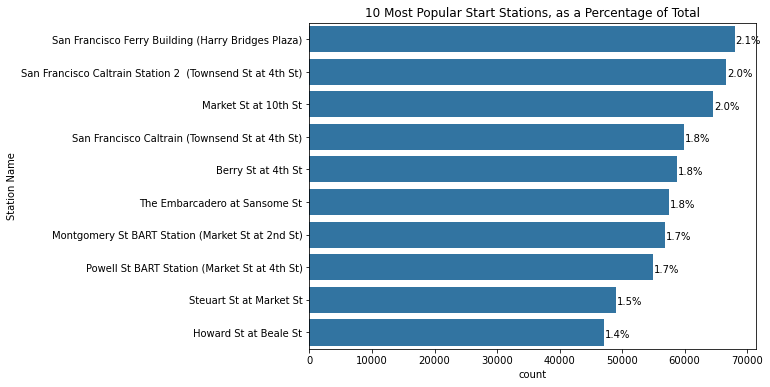

In [33]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = top10SS_df, y = 'start_station_name', color = base_colour, order = SSidx);
plt.title('10 Most Popular Start Stations, as a Percentage of Total');
plt.ylabel('Station Name');

for p in ax.patches:
    total_SS = len(df['start_station_name'])
    percentage_SS = '{:.1f}%'.format(100 * p.get_width()/total_SS)
    ax.annotate(percentage_SS,((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),
                textcoords='offset points', horizontalalignment='left')       

In [34]:
ESidx = df['end_station_name'].value_counts().index[:10]

In [35]:
top10ES_df = df.loc[df['end_station_name'].isin(ESidx)]

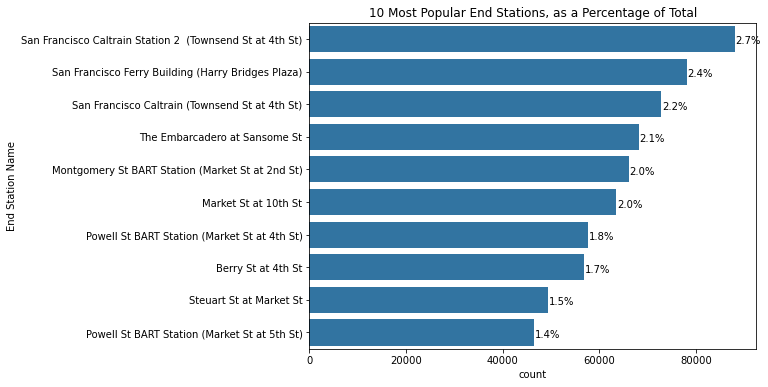

In [36]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = top10ES_df, y = 'end_station_name', order = ESidx, color = base_colour);
plt.title('10 Most Popular End Stations, as a Percentage of Total');
plt.ylabel('End Station Name');

for p in ax.patches:
    total_ES = len(df['end_station_name'])
    percentage_ES = '{:.1f}%'.format(100 * p.get_width()/total_ES)
    ax.annotate(percentage_ES,((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18), textcoords='offset points', horizontalalignment='left')       


In [37]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,1335.166667


In [38]:
df['start_time'].dt.month.value_counts().sort_index()

1     286884
2     290130
3     367681
4     370280
5     179125
6     198657
7     243295
8     275454
9     284775
10    310395
11    229747
12    217902
Name: start_time, dtype: int64

In [39]:
#investigating bike useage by different time variables

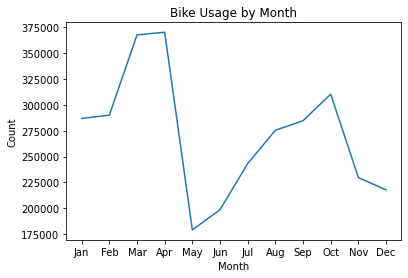

In [40]:
df['start_time'].dt.month.value_counts().sort_index().plot(kind='line');
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Bike Usage by Month');
plt.xticks(np.arange(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

In [41]:
#The trends in the monthly usage is influenced by the limited monthly data for the years of 2019 and 2017. 

In [42]:
#Checking trends in monthly usage for 2018, where we have a full year's worth of coverage. 

In [43]:
df_2018 = df[df['start_time'].dt.year == 2018]

In [44]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

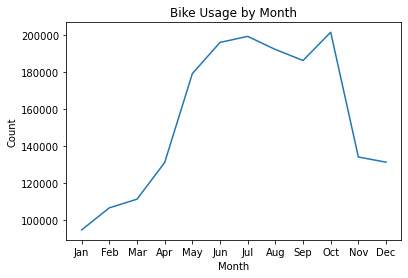

In [45]:
df_2018['start_time'].dt.month.value_counts().sort_index().plot(kind='line');
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Bike Usage by Month');
plt.xticks(np.arange(1,13), months);

In [46]:
#This graph falls more in line with expectations, where bike useage decreases during colder months

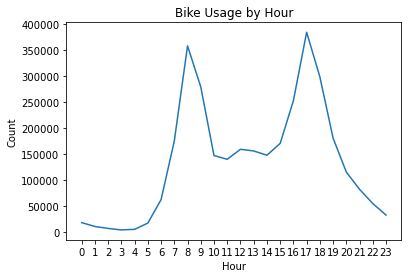

In [47]:
df['start_time'].dt.hour.value_counts().sort_index().plot(kind='line');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.title('Bike Usage by Hour');
plt.xticks(np.arange(0,24), np.arange(0,24));

In [48]:
#From these graphs we can see the most popular times when bikes were used. The data indicates the most popular times 
#were 8:00 and 17:00, suggesting the bikes are commonly used for commuting. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I decided to transform the bike ride data by changing trip duration to minutes in order to make it more understandable. huge majority of the bike rides were short, with most rides falling into the 10 mins range. This data may be useful to suggest a pricing model. Currently the pricing model allows 30 min rides for non-members for \$3.
>
> When investigating monthly usage, I noticed unusual trends. I thought this could be due to the limited amount of monthly data available in 2017 and 2019, leading me to investigate monthly trends during the year 2018, which revealed usage patterns that were more in line with expectations (usage dropping off during colder months).
>
> Bike usage by hour shows peak usage at 8:00 and 17:00, this would suggest that many of the rides are used for commuting. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

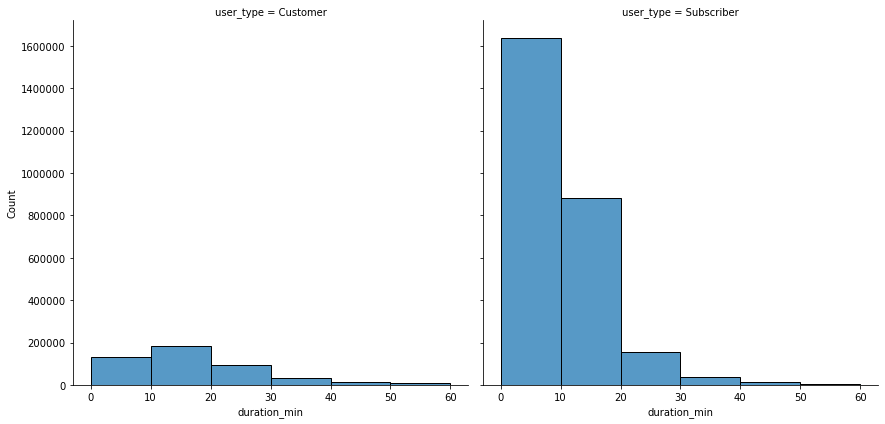

In [49]:
#Investigating the relationship between ride length and member type. 
g = sns.FacetGrid(data = trips_under60, col = 'user_type', height = (6) );
g.map(sns.histplot, 'duration_min', bins = np.arange(0, 70, 10));
plt.ticklabel_format(style='plain', axis='y');

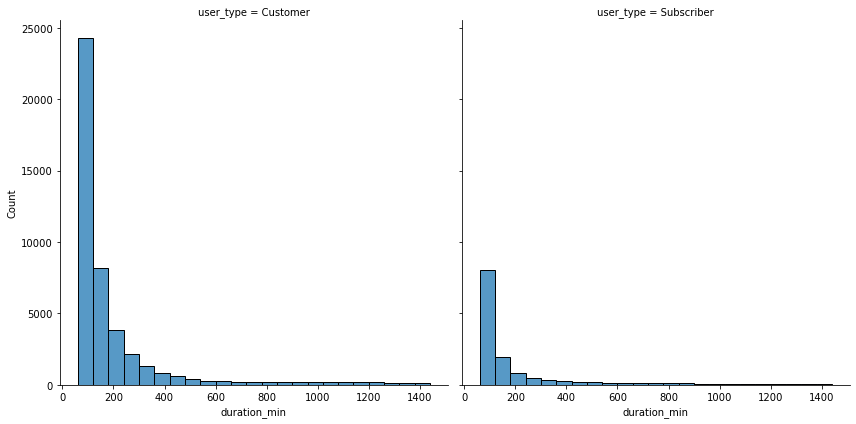

In [50]:
h = sns.FacetGrid(data = trips_over60, col = 'user_type', height = (6) );
h.map(sns.histplot, 'duration_min', bins = np.arange(60, 1460, 60));

In [51]:
#The distribution for longer bike trips between customers and subscribers seems similar. 
#The pricing model for customers and subscribers has a $0.10 difference for each minute over allotted amount.
df['user_type'].value_counts()

Subscriber    2747580
Customer       506745
Name: user_type, dtype: int64

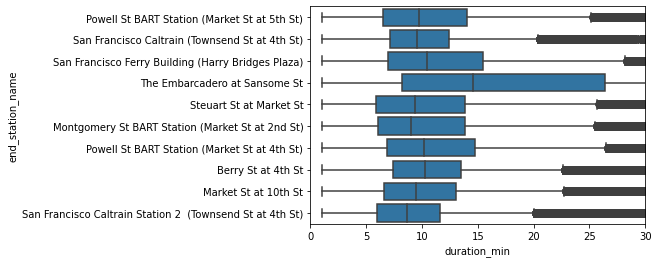

In [52]:
#which stations have the longest trip times associated with them?
sns.boxplot(data = top10ES_df, x = 'duration_min', y ='end_station_name', color = base_colour);
plt.xlim(0,30);

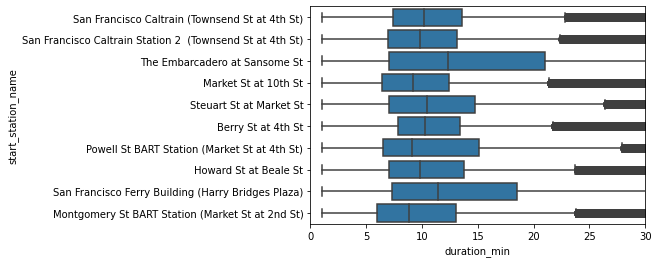

In [64]:
sns.boxplot(data = top10SS_df, x = 'duration_min', y ='start_station_name', color = base_colour);
plt.xlim(0,30);

In [53]:
df['month'] = df['start_time'].dt.month

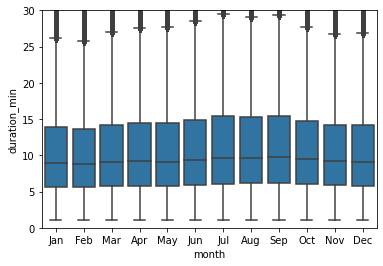

In [54]:
#Which Month had the longest bike rides?
sns.boxplot(data = df, x = 'month', y = 'duration_min', color = base_colour);
plt.ylim(0,30);
plt.xticks(np.arange(0,12), months);

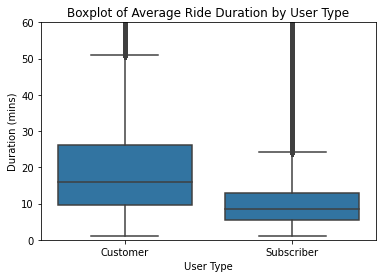

In [55]:
sns.boxplot(data = df, x = 'user_type', y = 'duration_min', color = base_colour);
plt.ylim(0,60);
plt.ylabel('Duration (mins)');
plt.xlabel('User Type');
plt.title('Boxplot of Average Ride Duration by User Type');

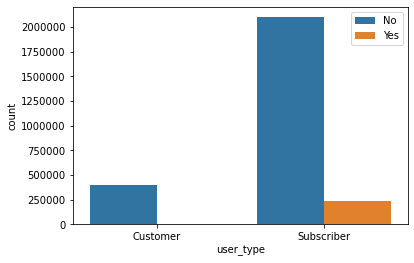

In [62]:
#which user type is more likely to bike-share?
sns.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');
plt.ticklabel_format(style='plain', axis='y');
plt.legend(bbox_to_anchor = (1,1));

In [57]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,1335.166667,12


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was interesting to see that the majority of trips over 60 minutes were made by customers. The majority of people in the dataset are subscribers and it is more expensive for a customer to hire a bike for longer periods of time than it is for customers. 
>
> The boxplot of trip duration against user type also shows a larger distribution for customers centered over a longer period of time than subscribers. 
>
> When looking at the distrubution of trip times against the top ten end stations, there was one station that did not match the trend called 'The Embarcadero at Sansome St'. 
>
>There was a negligible difference between the distribution of trip times against Months.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of trips did not use bike sharing. No customers used bike sharing.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

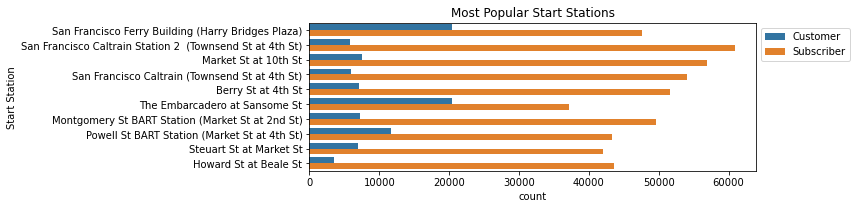

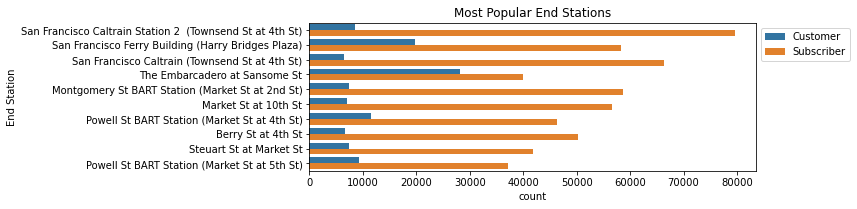

In [63]:
plt.figure(figsize = (8,6));
ax = plt.subplot(2,1,1);
sns.countplot(data = top10SS_df, y = 'start_station_name', hue = 'user_type', order = SSidx);
plt.title('Most Popular Start Stations');
plt.ylabel('Start Station');
plt.legend(bbox_to_anchor = (1,1));

plt.figure(figsize = (8,6));
ax = plt.subplot(2,1,2);
sns.countplot(data = top10ES_df, y = 'end_station_name', hue = 'user_type', order = ESidx);
plt.title('Most Popular End Stations');
plt.ylabel('End Station');
plt.legend(bbox_to_anchor = (1,1));

In [59]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,1335.166667,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,1313.333333,12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,762.800000,12


In [85]:
df['day_name'] = df['start_time'].dt.day_name()
df['month_name'] = df['start_time'].dt.month_name()
df['hour'] = df['start_time'].dt.hour


In [92]:
df['day_name'].value_counts()

Tuesday      553544
Thursday     553527
Wednesday    545428
Friday       509976
Monday       509598
Saturday     309865
Sunday       272387
Name: day_name, dtype: int64

In [86]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,duration_min,month,day,day_name,month_name,hour,hour_counts
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,96,Customer,NaN,1335.166667,12,<bound method PandasDelegate._add_delegate_acc...,Sunday,December,16,17595.0


In [106]:
df_customers = df.query("user_type == 'Customer'");
df_subscribers = df.query("user_type == 'Subscriber'");

In [114]:
df_customers['hour'].value_counts().sort_index()

0      3398
1      2140
2      1440
3       650
4       575
5      1502
6      4412
7     13242
8     29408
9     27522
10    26412
11    32276
12    36665
13    38713
14    39069
15    40917
16    44975
17    51934
18    41871
19    26380
20    16422
21    12099
22     9153
23     5570
Name: hour, dtype: int64

In [ ]:
sns.lineplot(data = )

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

